Notebook for looking at the behaviour files for the participants

In [9]:
## Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('dark')
import os
# from pathlib import Path

import mc.analyse.analyse_MRI_behav as analyse_MRI_behav

In [4]:
DATA_FOLDER = "/Users/student/PycharmProjects/data"

SUB = 'sub-02'


PART_1 = f"{DATA_FOLDER}/raw/{SUB}/beh/{SUB}_fmri_pt1.csv"
# Load the behavioiur file
configs, rew_list, rew_index, walked_path, steps_subpath_alltasks, subpath_after_steps, timings, regressors \
      = analyse_MRI_behav.extract_behaviour(PART_1)




In [11]:
# Getting the transition matricies over all the participants
subject_list =  f'{DATA_FOLDER}/raw' 
subject_list = os.listdir(subject_list)
subject_list = [str(sub) for sub in subject_list]
subject_list.sort()
# subject_list = [subject_list[2]]
# subject_list = subject_list[0:2]
subject_list

['sub-01',
 'sub-02',
 'sub-03',
 'sub-04',
 'sub-05',
 'sub-06',
 'sub-07',
 'sub-08',
 'sub-09',
 'sub-10',
 'sub-11',
 'sub-12',
 'sub-13',
 'sub-14',
 'sub-15',
 'sub-16',
 'sub-17',
 'sub-18',
 'sub-19',
 'sub-20',
 'sub-21',
 'sub-22',
 'sub-23',
 'sub-24',
 'sub-25',
 'sub-26',
 'sub-27',
 'sub-28',
 'sub-29',
 'sub-30',
 'sub-31',
 'sub-32',
 'sub-33',
 'sub-34',
 'sub-35']

In [41]:
# NOTE: The part two of the data is missing as is cant be loaded 


task_list = ['A1_forw', 'B1_forw', 'C1_forw', 'D1_forw', 'E1_forw', 'A1_backw', 'B1_backw', 'C1_backw', 'D1_backw', 'E1_backw', 
             'A2_forw', 'B2_forw', 'C2_forw', 'D2_forw', 'E2_forw', 'A2_backw', 'B2_backw', 'C2_backw', 'D2_backw', 'E2_backw',]


# Create a transition matrix for each task

# Get a list of all the possible states
states = []
for x_coord in range(3):
    for y_coord in range(3):
        states.append((x_coord, y_coord))

# Create a transition matrix for each task
transition_matrices = {}
for TASK in task_list: 
    transition_matrix = pd.DataFrame(index=states, columns=states, dtype=float, data=0)
    transition_matrices[TASK] = transition_matrix

subject_list = subject_list[1::]
# For each subject, add the transitions they made for each task into the transition matrix
for SUB in subject_list:
    # for TASK in task_list:
    PART_1 = f"{DATA_FOLDER}/raw/{SUB}/beh/{SUB}_fmri_pt1.csv"
    PART_2 = f"{DATA_FOLDER}/raw/{SUB}/beh/{SUB}_fmri_pt2.csv"
    # Load the behaviour files
    configs1, rew_list1, rew_index1, walked_path1, steps_subpath_alltasks1, subpath_after_steps1, timings1, regressors1 \
        = analyse_MRI_behav.extract_behaviour(PART_1)
    # configs2, rew_list2, rew_index2, walked_path2, steps_subpath_alltasks2, subpath_after_steps2, timings2, regressors2 \
    #     = analyse_MRI_behav.extract_behaviour(PART_2)
    
    # Combine the walked paths dictionaries into one list
    # walked_path = {**walked_path1, **walked_path2}
    walked_path = walked_path1

    for TASK in task_list:
        # Get the path for the task
        path = walked_path[TASK] if TASK in walked_path.keys() else None
        if path is None:
            continue
        else:
            # Convert the path into a list of states (tuples)
            path = [(int(x), int(y)) for x, y in path]
            
            # For each transition in the path, add it to the transition matrix
            for i in range(len(path)-1):
                transition_matrices[TASK][path[i]][path[i+1]] += 1


# Normalise the transition matrices
for TASK in task_list:
    transition_matrices[TASK] /= transition_matrices[TASK].values.max()
    pass



    # print(walked_path1.keys())

72.0
86.0
68.0
100.0
76.0
75.0
82.0
79.0
110.0
76.0
21.0
31.0
20.0
30.0
32.0
20.0
35.0
20.0
33.0
29.0


In [42]:
transition_matrices['A1_forw']

,"(0, 0)","(0, 1)","(0, 2)","(1, 0)","(1, 1)","(1, 2)","(2, 0)","(2, 1)","(2, 2)"
"(0, 0)",0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
"(0, 1)",0.166667,0.000000,0.972222,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
"(0, 2)",0.000000,0.000000,0.000000,0.000000,0.000000,0.986111,0.000000,0.000000,0.000000
"(1, 0)",0.833333,0.000000,0.000000,0.000000,0.013889,0.000000,0.000000,0.000000,0.000000
"(1, 1)",0.000000,0.138889,0.000000,0.833333,0.000000,0.041667,0.000000,0.000000,0.000000
"(1, 2)",0.000000,0.000000,0.013889,0.000000,0.319444,0.000000,0.000000,0.000000,0.972222
"(2, 0)",0.000000,0.000000,0.000000,0.013889,0.000000,0.000000,0.000000,0.000000,0.000000
"(2, 1)",0.000000,0.000000,0.000000,0.000000,0.680556,0.000000,0.013889,0.000000,0.000000
"(2, 2)",0.000000,0.000000,0.000000,0.000000,0.000000,0.277778,0.000000,0.694444,0.000000


In [424]:


# def create_transistion_matrix_dict():

#     positions = []
#     transition_matrix_dict = {}
#     # Create a transition matrix with correct axis labels
#     for i in range(3):
#         for j in range(3):
#             positions.append((i, j))

#     for TASK in task_list:
#         # Create pd dataframe of all possible transitions
#         transition_matrix = pd.DataFrame(index=positions, columns=positions, data=1e-7, dtype=float)
#         # create the transition matrix
#         for idx, position in enumerate(walked_path[TASK]):
#             if idx < len(walked_path[TASK]) - 1:
#                 next_position = walked_path[TASK][idx + 1]
#                 # print(position, next_position)
#                 transition_matrix[position][next_position] = transition_matrix[position][next_position] + 1


#     transition_matrix_dict[TASK] = transition_matrix

#     return transition_matrix_dict


# transition_matrix_dict = create_transistion_matrix_dict()
# transition_matrix_dict

KeyError: 'A1_forw'

In [ ]:
transition_matrix_dict = {}
task_list = ['A1_forw', 'B1_forw', 'C1_forw', 'D1_forw', 'E1_forw', 'A1_backw', 'B1_backw', 'C1_backw', 'D1_backw', 'E1_backw']



for TASK in task_list:

    # Turn the walked path into a list of tuples
    walked_path[TASK] = [(int(x[0]), int(x[1])) for x in walked_path[TASK]]


    # Create a transition matrix with correct axis labels
    positions = []
    for i in range(3):
        for j in range(3):
            positions.append((i, j))

    # Create pd dataframe of all possible transitions
    transition_matrix = pd.DataFrame(index=positions, columns=positions, data=1e-7, dtype=float)
    # create the transition matrix
    for idx, position in enumerate(walked_path[TASK]):
        if idx < len(walked_path[TASK]) - 1:
            next_position = walked_path[TASK][idx + 1]
            # print(position, next_position)
            transition_matrix[position][next_position] = transition_matrix[position][next_position] + 1


    # normalise the transition matrix only if there are transitions in that row

    transition_matrix = transition_matrix / transition_matrix.max()


    transition_matrix_dict[TASK] = transition_matrix


TASK = task_list[4]

plt.title("Transition matrix")
plt.imshow(transition_matrix_dict[TASK], cmap='plasma')
plt.xticks(range(transition_matrix_dict[TASK].shape[0]), transition_matrix_dict[TASK].columns, rotation=45)
plt.yticks(range(transition_matrix_dict[TASK].shape[1]), transition_matrix_dict[TASK].index, rotation=0)
plt.colorbar()
plt.show()

/var/folders/pk/s26kzmd55l7drhv1s1c4b_j40000gn/T/ipykernel_23119/3730460260.py:25: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  transition_matrix[position][next_position] = transition_matrix[position][next_position] + 1
/var/folders/pk/s26k

KeyError: 'A1_backw'

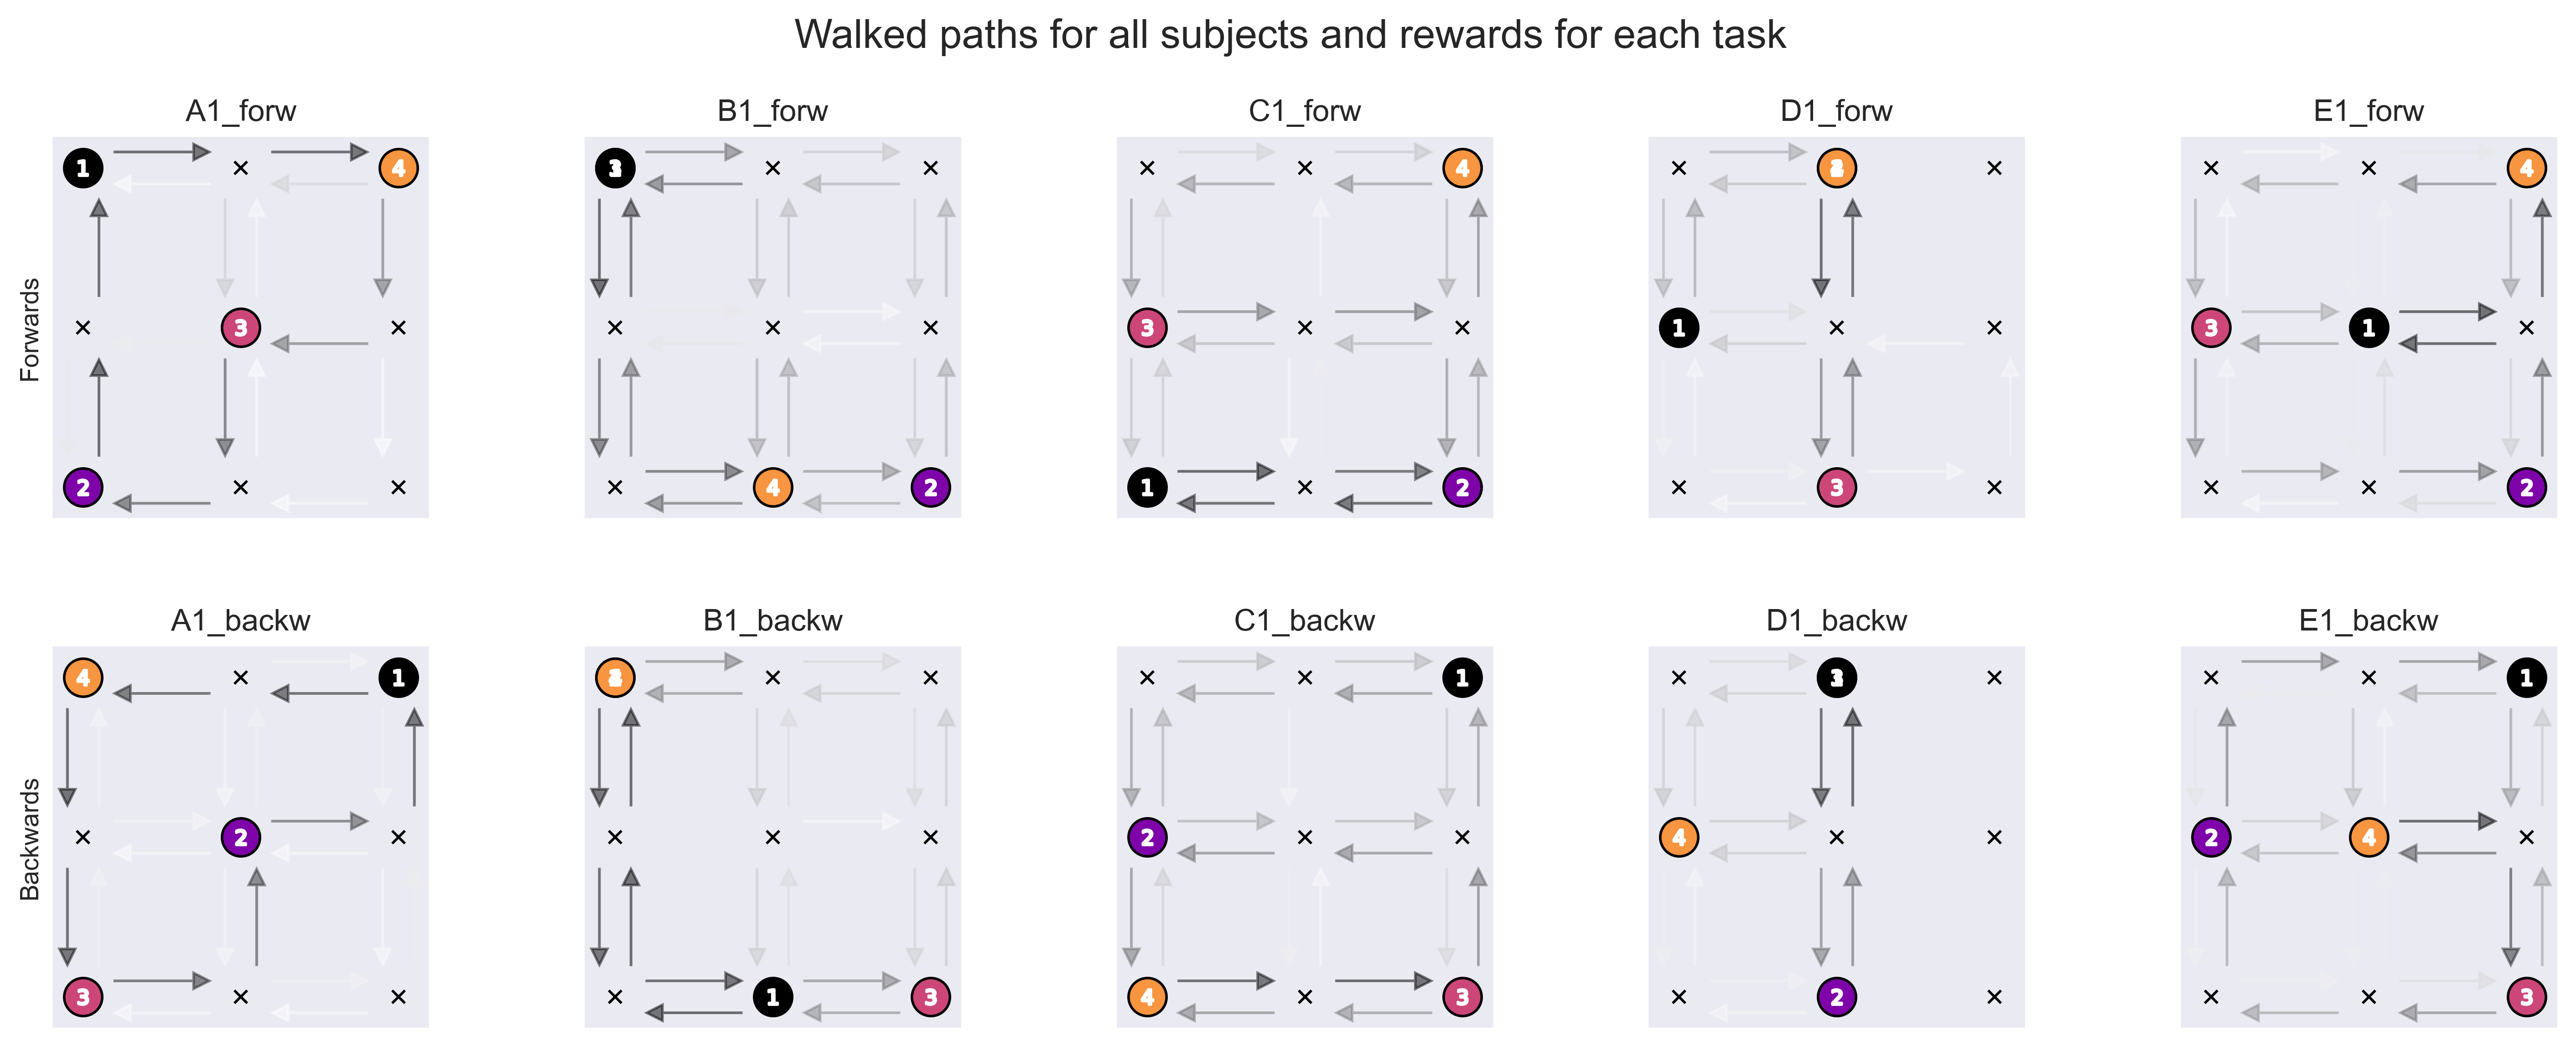

In [52]:


# plot the path
#1. create the grid
grid = np.empty((3, 3), dtype=object)
# 5 subplots
fig, axs = plt.subplots(2, 5, figsize=(15, 6), dpi=400)
fig.tight_layout(pad=3.0)

# title for whole plot
fig.suptitle(f"Walked paths for all subjects and rewards for each task", fontsize=16, y=1.03)


# title for each subplot
task_list = ['A1_forw', 'B1_forw', 'C1_forw', 'D1_forw', 'E1_forw', 'A1_backw', 'B1_backw', 'C1_backw', 'D1_backw', 'E1_backw']

for ax_idx, ax in enumerate(axs.flat):
    ax.set_title(task_list[ax_idx])
    # ax.imshow(grid, cmap='plasma')
    # plot grid points
    ax.plot([0, 0, 0, 1, 1, 1, 2, 2, 2], 
            [0, 1, 2, 0, 1, 2, 0, 1, 2], 'x', color='black', markersize=5)

    # remove axs labels
    ax.set_xticks([])
    ax.set_yticks([])
    # [ax.axhline(i, color='black', linewidth=1) for i in [0, 1, 2]]
    # [ax.axvline(i, color='black', linewidth=1) for i in [0, 1, 2]]

    # Change the axis limits
    ax.set_xlim(-0.2, 2.2)
    ax.set_ylim(-0.2, 2.2)
    pass
# plot label for part 1 and two on y axis
axs[0, 0].set_ylabel("Forwards")
axs[1, 0].set_ylabel("Backwards")

# plot the rewards on the grid

cmap = plt.get_cmap('plasma')
for TASK in task_list:
    # print(TASK)
    # get the rewards for the task
    rew = rew_list[TASK][0:4]
    # get the axis
    ax = axs.flat[task_list.index(TASK)]
    # plot the rewards
    for idx, r in enumerate(rew):
        H = 0.2
        r1 = rew[idx + 1 if idx + 1 < 4 else 0]
        color = cmap(idx / 4)
        # print(r)


        ax.plot(r1[0], r1[1], 'o', color='black', markersize=15)
        ax.plot(r[0], r[1], 'o', color=color, markersize=13)


        dx, dy = r1[0] - r[0], r1[1] - r[1]
        # plot arrow between the points
        # ax.arrow(r[0], 
        #          r[1], 
        #          dx, 
        #          dy, 
        #          head_width=H, 
        #          head_length=H, 
        #          fc=color, 
        #          ec='k', 
        #          length_includes_head=True, 
        #          color=color)
        
        # plot the number of the reward
    for idx, r in enumerate(rew):
        ax.plot(r[0], r[1], marker = f"${idx+1}$", color='white')


# Arrow plot parameters
offsetDistance = 0.2
directionOffset = 0.1
ALPHA = 0.5
LINESTYLE = '-'
arrow_max = 40

cmap2 = plt.get_cmap('Grays')

for TASK_IDX, TASK in enumerate(task_list):
    transition_matrix = transition_matrices[TASK]
    ax = axs.flat[TASK_IDX]

    for s_idx, start in enumerate(transition_matrix.index):
        for e_idx, end in enumerate(transition_matrix.columns):
            if transition_matrix.iloc[s_idx, e_idx] > 1e-2:

                # if the arrow is going from left to right
                if start[1] == end[1] and start[0] < end[0]:
                    ax.arrow(start[0] + offsetDistance,
                            start[1] + directionOffset, 
                            end[0] - start[0] - 2 * offsetDistance,
                            end[1] - start[1] , 
                            # width = transition_matrix.iloc[s_idx, e_idx] / arrow_max,
                            color = cmap2(transition_matrix.iloc[s_idx, e_idx]),

                            head_width=0.1, 
                            head_length=0.1, 
                            # fc='k', 
                            # ec='k', 
                            length_includes_head=True,
                            linestyle=LINESTYLE,
                            alpha = ALPHA)
                    
                # if the arrow is going from right to left
                if start[1] == end[1] and start[0] > end[0]:
                    ax.arrow(start[0] - offsetDistance,
                            start[1] - directionOffset, 
                            end[0] - start[0] + 2 * offsetDistance,
                            end[1] - start[1],
                            # width = transition_matrix.iloc[s_idx, e_idx] / arrow_max,
                            color = cmap2(transition_matrix.iloc[s_idx, e_idx]),
    
                            head_width=0.1, 
                            head_length=0.1, 
                            # fc='k', 
                            # ec='k', 
                            length_includes_head=True,
                            linestyle=LINESTYLE,
                            alpha = ALPHA)

                # if the arrow is going from top to bottom
                if start[0] == end[0] and start[1] < end[1]:
                    ax.arrow(start[0] + directionOffset,
                            start[1] + offsetDistance, 
                            end[0] - start[0],
                            end[1] - start[1] - 2 * offsetDistance, 
                            # width = transition_matrix.iloc[s_idx, e_idx] / arrow_max,
                            color = cmap2(transition_matrix.iloc[s_idx, e_idx]),
     
                            head_width=0.1, 
                            head_length=0.1, 
                            # fc='k', 
                            # ec='k', 
                            length_includes_head=True,
                            linestyle=LINESTYLE,
                            alpha = ALPHA)

                # if the arrow is going from bottom to top
                if start[0] == end[0] and start[1] > end[1]:
                    ax.arrow(start[0] - directionOffset,
                            start[1] - offsetDistance, 
                            end[0] - start[0],
                            end[1] - start[1] + 2 * offsetDistance, 
                            # width = transition_matrix.iloc[s_idx, e_idx] / arrow_max,
                            color = cmap2(transition_matrix.iloc[s_idx, e_idx]),
                            head_width=0.1, 
                            head_length=0.1, 
                            # fc='k', 
                            # ec='k', 
                            length_includes_head=True,
                            linestyle=LINESTYLE,
                            alpha = ALPHA)

                pass



plt.show()

how often does each transition occur? (in grid space)
how often does each button press occur? (in button space)

How similar are different tasks in terms of the transitions and button presses?

##  Correlation
How correlsated are the transition in 12 [work out the ]
how correlated are the buttn pressed in 4 (1 hot encoded x frequency)

how frequent is each button press for each taslk [ 4]
Sub 1 - 35
A:R1-R2  :[
    2
    4
]

A: RN - RN+1: [
    1
    3
    3
    0
]


A: RN - RN+1: [
    1
    2
]

A: RN - RN+1: [
    1
    2
]

REMOVES TIME FROM THE REPRESENTATION
Could add a way of embedding so that when a button is pressed at the same time, the similarity is higher: 
    Concatenate over time

labels: which oattern, ABCDE?

labels: which transition in the grid subpath transitions
for each transition (between a pair of rewards), what are the set of button presses that occur?
plot that: (pca for meaningful transitons) similarity matrix

How to do the dim reduction


which transition occur most often? / plot it!

how do you know that you arent just measurung the differences in time 

Slides:
- Intro to the task
- the first seconds of the TR (
- Look at svenja's slides for the structure of presentation
- and: for the brain areas of ineterest


## Embedding the Meaning of the transitions 
# 1. The number of button clicks
# Not time embedded clicks
# For each subject, get the button click data from the file

# For each subject, for each task, get the button click data
# Count the number of each button click. Could plot histogram of the number of each button click

# Calculate the vector of the number of button clicks for each task and compute the similarity between them





In [ ]:
# Load the behaviour file
FILE = Path(SUB) / 'beh' / f'{SUB[-6:]}_fmri_pt1.csv'
raw_beh = pd.read_csv(FILE)
# raw_beh.
raw_beh

,rep_runs.thisRepN,rep_runs.thisTrialN,rep_runs.thisN,rep_runs.thisIndex,next_task,round_no,task_config,jitters_subpath,start_ABCD_screen,curr_loc_x,...,reward_A_feedback.started,reward_A_feedback.stopped,TR_key.keys,TR_key.rt,TR_key.started,TR_key.stopped,participant,session,date,Unnamed: 55
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2023-09-12_13h57.17.103,NaN
1,0.0,0.0,0.0,0.0,88.864084,2.0,C1,[1.68935383 1.68935383 0.84467691 1.68935383 2...,88.864840,0.21,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2023-09-12_13h57.17.103,NaN
2,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0.21,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2023-09-12_13h57.17.103,NaN
3,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0.21,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2023-09-12_13h57.17.103,NaN
4,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2023-09-12_13h57.17.103,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
554,1.0,0.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2023-09-12_13h57.17.103,NaN
555,1.0,0.0,1.0,0.0,NaN,NaN,NaN,[1.31089641 1.31089641 2.62179282],NaN,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2023-09-12_13h57.17.103,NaN
556,1.0,0.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,0.21,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2023-09-12_13h57.17.103,NaN
557,2.0,0.0,2.0,0.0,NaN,NaN,NaN,NaN,NaN,0.21,...,1859.156149,NaN,"['5', '5', '5', '5', '5', '5', '5', '5', '5', ...","[0.8690334996208549, 1.9573437999933958, 3.019...",0.014757,NaN,NaN,1.0,2023-09-12_13h57.17.103,NaN
